# Case Study on Loan Defaulter Prediction

## Problem Statement

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at 


### Objective

To predict defaulter or non-defaulter.

### Attributes

1. checking_balance

2. months_loan_duration

3. credit_history

4. purpose

5. amount

6. saving_balance

7. employment_duration

8. percent_of_income

9. years_at_residence

10. age

11. other_credits

12. housing

13. existing_loans_count

14. job

15. dependents

16. phone

17. default



### Table of Content

1.Import Libraries

2.Setting options

3.Read Data

4.Data Analysis and Preparation

    4.1 - Understanding the Dataset
    
    4.1.1 - Data Types
    
    4.1.2 - Summary Statistics
    
    4.1.3 - Missing Value check
    
    4.1.4 - Discover Outliers with Visualization

5.Univariate Analysis

6.Multivariate Analysis 
    6.1 - Visualizing features having strongest relation with target variable

7.Creating and Regularizing Decision Tree Model

8.Applying Ensemble techniques : Bagging, AdaBoosting, Gradient Boosting and Random Forest.

9.Creating Confusion Matrix

10.Conclusion and Interpretation



### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, confusion_matrix

### Setting Options

In [3]:
#supress the warnings
warnings.filterwarnings('ignore')

### Reading data

In [4]:
#Loading dataset
df = pd.read_csv('credit.csv')

### Data Analysis and Data Preparation

In [5]:
#viewing data
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


Here we can see 'default' is target variable and all other are independent variables

In [6]:
#Checking dimension of dataset
df.shape

(1000, 17)

In [7]:
#Checking attribute of dataset
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [8]:
#Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [9]:
#Checking NULL values
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

There are no NULL values.

In [10]:
#Checking duplicates
df.duplicated().sum()

0

There are no duplicates.

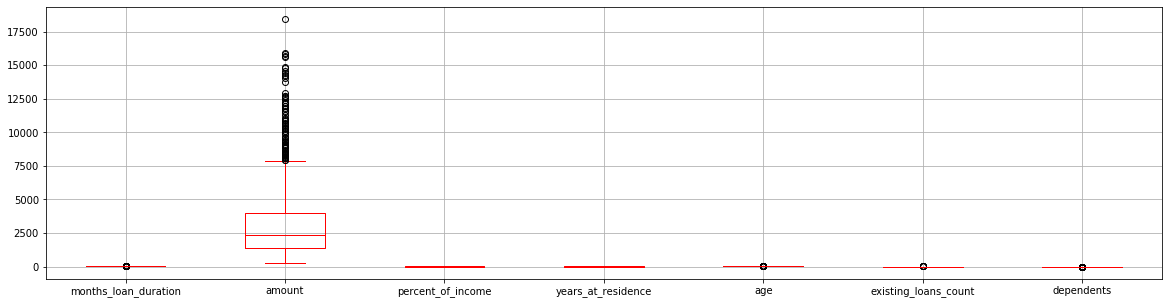

In [11]:
#Checking outliers using boxplot
df.boxplot(figsize=(20,5),color='red')

In [12]:
#Checking datatypes
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

Convert columns with 'object' datatype to categorical variables.

In [13]:
#Creating a copy before making any changes 
df1 = df.copy(deep=True)

In [14]:
for cols in df1.columns:   #Loop through all columns
    if df1[cols].dtype == 'object':    #only apply for columns with categorical
        df1[cols] = pd.Categorical(df1[cols])
df1.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

Get value counts for every column

In [15]:
print(df1.checking_balance.value_counts())
print(df1.credit_history.value_counts())
print(df1.purpose.value_counts())
print(df1.savings_balance.value_counts())
print(df1.employment_duration.value_counts())
print(df1.other_credit.value_counts())
print(df1.housing.value_counts())
print(df1.job.value_counts())
print(df1.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [16]:
#Creating structure to replace
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]


In [17]:
#Replacing with structure and creating dummies
df1=df1.replace(replaceStruct)
df1=pd.get_dummies(df1, columns=oneHotCols)
df1.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


### Univariate Analysis

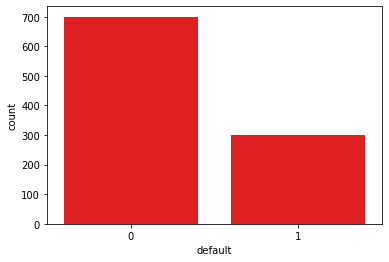

In [18]:
sns.countplot(df1['default'], color='red')

In [19]:
df1['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

So there are 700 people who are defaulter and 300 people who are not defaulter.

### Multivaraiate Analysis

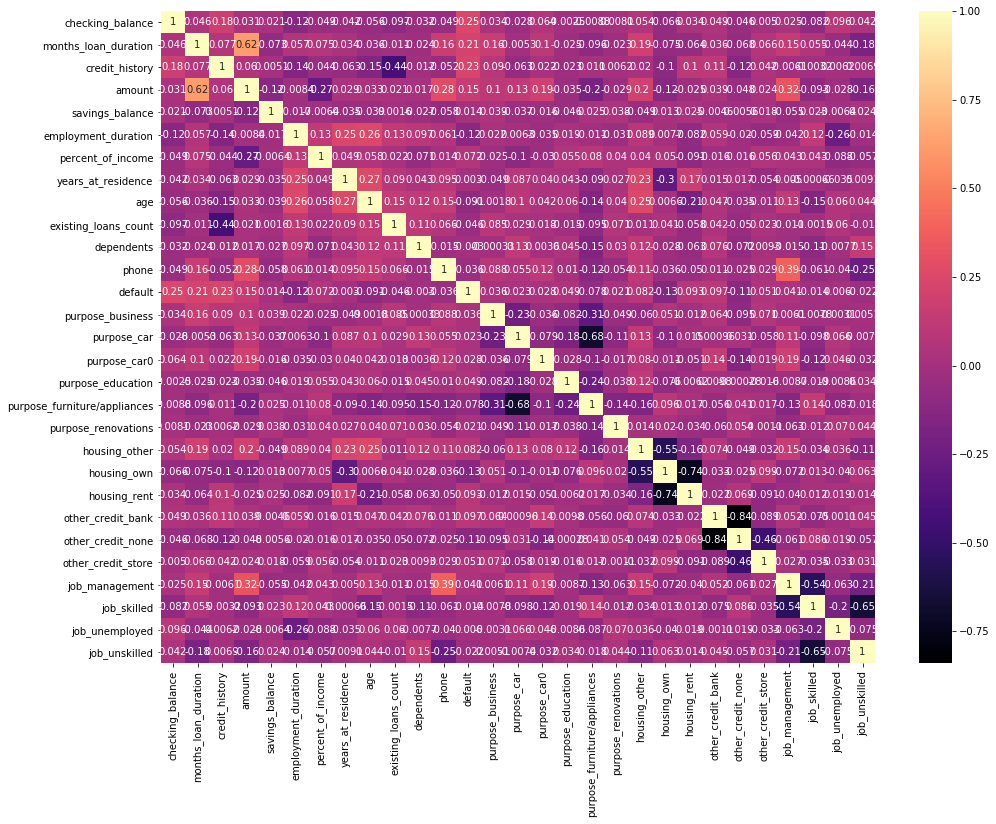

In [20]:
cor = df1.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap='magma')

We cannot see any multicollinearity in this data set, which is good.

### Splitting dataset

In [21]:
#Independent Variable
X= df1.drop(['default'], axis=1)

#Dependent Varaibale
y = df1['default']

#Splitting the dataset in the ratio of 70:30
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 28), (300, 28), (700,), (300,))

### Creating Decision Tree Model

In [22]:
#Creating object of decision tree

dt = DecisionTreeClassifier(criterion='gini', random_state= 1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [23]:
#Evaluating accuracy

pred = dt.predict(X_test)

print('Score on Test data', dt.score(X_test, y_test))
print('Score on Train data', dt.score(X_train,y_train))

Score on Test data 0.6933333333333334
Score on Train data 1.0


### Visualizing Decision Tree

In [24]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dt, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1.pasting the contents of that file at http://webgraphviz.com/ (or)

2.generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [25]:
! pip install graphviz

In [26]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


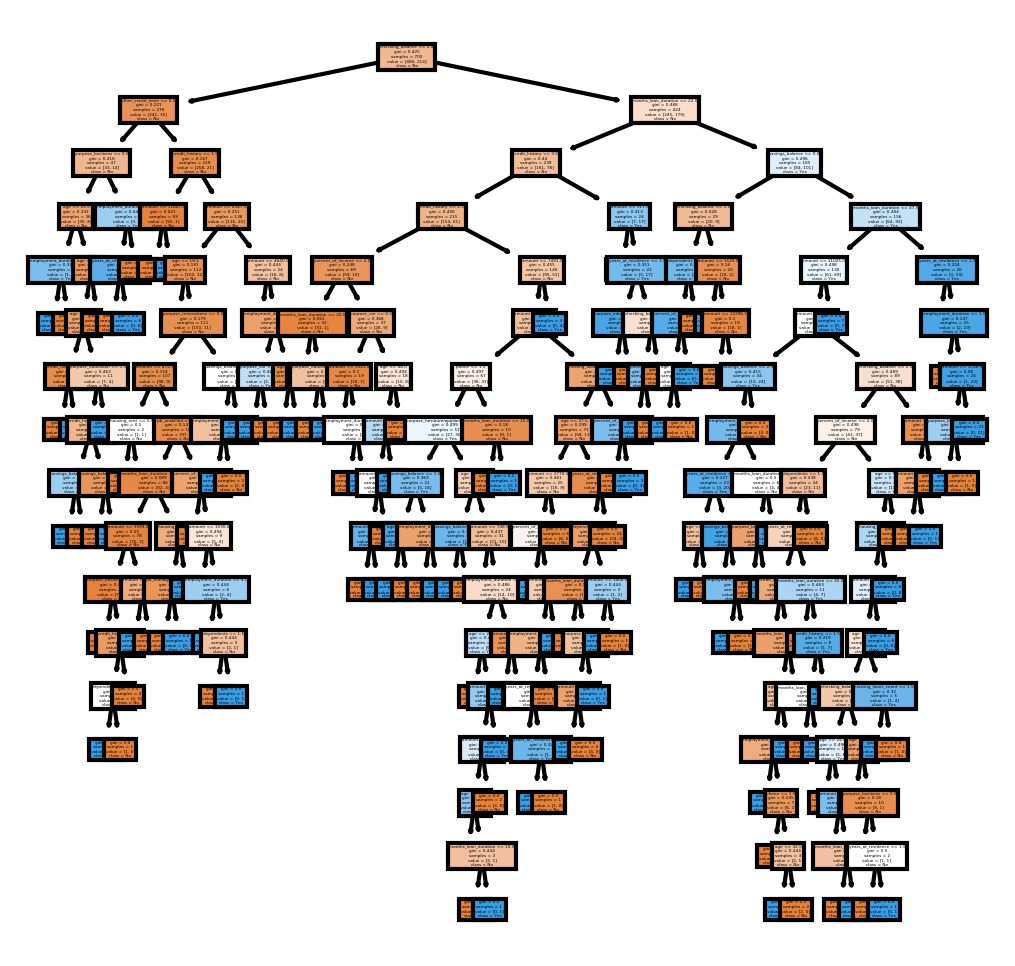

In [27]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

### Regularizing or Pruning Decision Tree

In [31]:
dt_pr = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dt_pr.fit(X_train, y_train)

#Predicting decison tree
dt_pr_pred = dt_pr.predict(X_test)

print('Score on Test data',dt_pr.score(X_train, y_train))
print('Score on Training data',dt_pr.score(X_test, y_test))

Score on Test data 0.7528571428571429
Score on Training data 0.7433333333333333


In [29]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = export_graphviz(dt_pr, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


system command returning error: 1


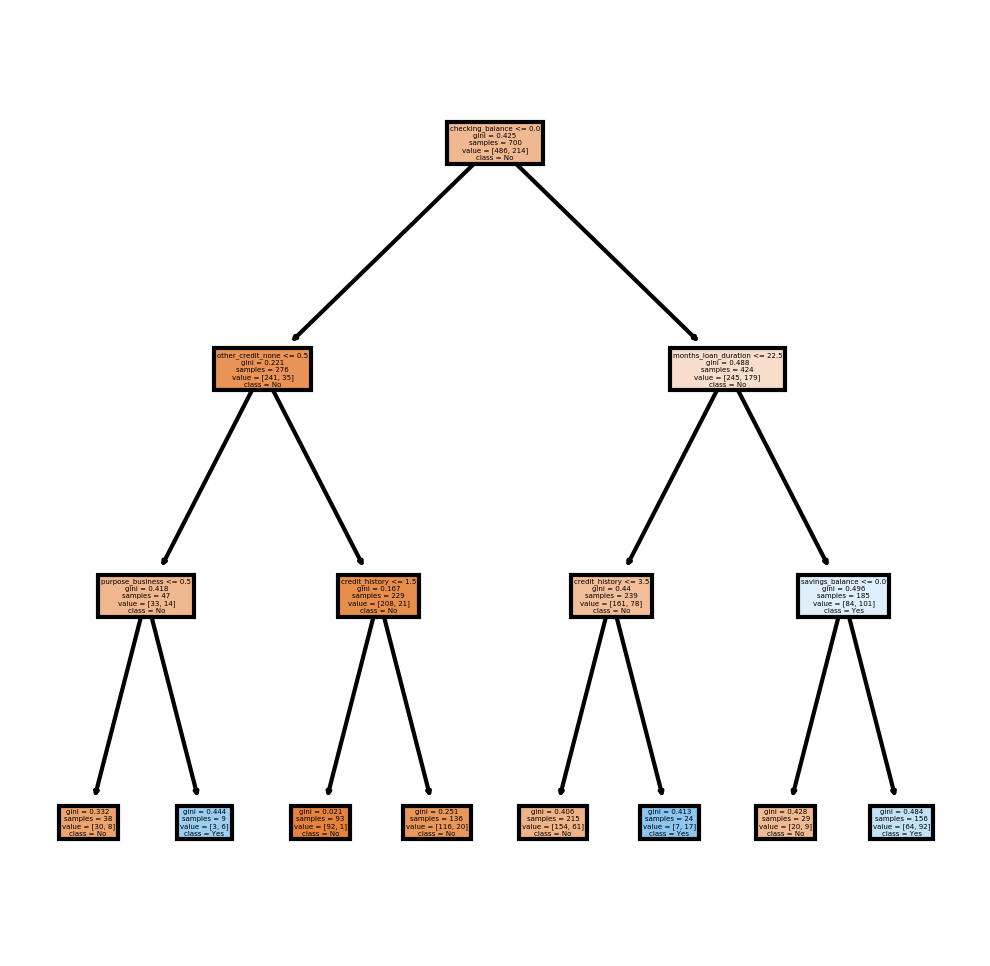

In [96]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt_pr, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

### Confusion Tree

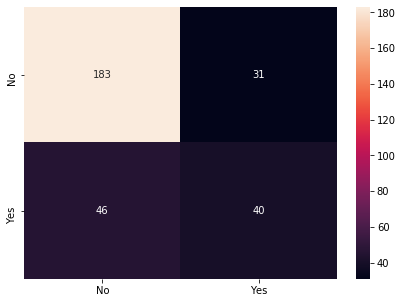

In [32]:
cm=metrics.confusion_matrix(y_test, dt_pr_pred , labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


## Ensemble Learning - Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator= dt, n_estimators=50,random_state=1)
#bag = BaggingClassifier(n_estimators=50,random_state=1)

bag = bag.fit(X_train, y_train)


0.7733333333333333


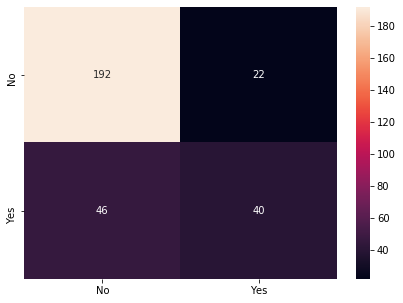

In [37]:
pred = bag.predict(X_test)

print(bag.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## Ensemble Learning - Adaboosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
ada = ada.fit(X_train, y_train)


0.74


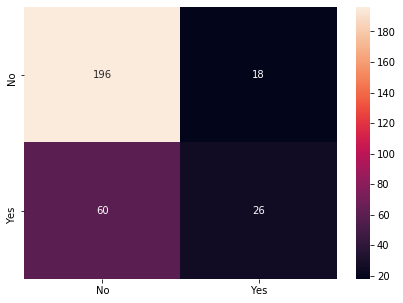

In [40]:
y_pred_ada = ada.predict(X_test)
print(ada.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_pred_ada,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## Ensemble Learning - GradientBoosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.74


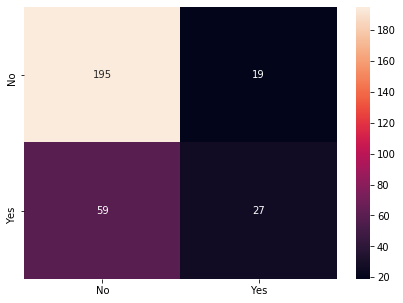

In [42]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning : Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.7766666666666666


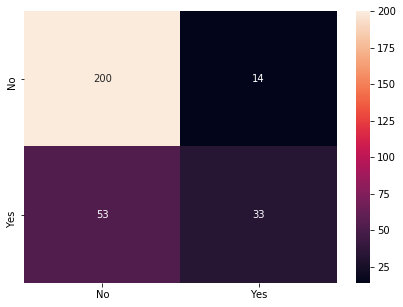

In [44]:
y_predict_rb = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict_rb,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Conclusion and Interpretation

So , after applying all ensemble techniques on this dataset we are getting best accuracy of 78% on test data using Random Forest Classifier.